In [1]:
library(ggplot2)
library(ggpmisc)
library(ggpubr)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(heatmap.plus)

Loading required package: ggpp


Attaching package: ‘ggpp’


The following object is masked from ‘package:ggplot2’:

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   
  as.character.polynomial polynom


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: grid

ComplexHeatmap version 2.16.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    gen

In [10]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
variant_list <- read.table("../variant_annotation/780_variant_annotation_by_all_samples.csv",header=T,sep=",",row.names=1)
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use validated variants. assign this to mosaic_filtered
shared_variant_list<-variant_list[variant_list$sample_number_presented>1,] #take shared variants names
CTX_only_variants<-shared_variant_list[shared_variant_list$CTX==1 | shared_variant_list$R==1,]$variant_list # 
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% CTX_only_variants,]

In [11]:
melt_mtcars<-shared_mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Location",'Region','Punch','Hemisphere')]
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('TBR1','DLX1'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX','BG','HIP'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]

melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1','2','3','4','5','6','7','8','9','10','11','12',
#                                                  '13','14','15','16','17') ,]
melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'),]
melt_mtcars<-melt_mtcars[!melt_mtcars$ID %in% c('7669_R_P_9_DLX1'),]

melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [12]:
length(unique(melt_mtcars$CHROM.POS.REF.ALT))

[1] 199

# heatmap

In [13]:
casted_MAF_VarBySample <- dcast(melt_mtcars, ID+Location+Cell_Type~CHROM.POS.REF.ALT, value.var = "MAF", rm.na=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$ID
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,-1]
nrow(casted_MAF_VarBySample2)
unique(casted_MAF_VarBySample2$Cell_Type)
unique(casted_MAF_VarBySample2$Location)

[1] 33

[1] "DLX1" "TBR1"

[1] "C"       "FAR_V"   "FAR_D"   "FAR_AD"  "FAR_A"   "FAR_AV"  "FAR_P"  
 [8] "FAR_PD"  "FAR_PV"  "NEAR_P"  "NEAR_A"  "NEAR_V"  "NEAR_D"  "NEAR_AV"
[15] "NEAR_PV" "NEAR_AD" "NEAR_PD"

In [14]:
rownames(casted_MAF_VarBySample2)

[1] "7669_R_P_1_DLX1"  "7669_R_P_1_TBR1"  "7669_R_P_10_DLX1" "7669_R_P_11_DLX1"
 [5] "7669_R_P_11_TBR1" "7669_R_P_12_DLX1" "7669_R_P_12_TBR1" "7669_R_P_13_DLX1"
 [9] "7669_R_P_13_TBR1" "7669_R_P_14_DLX1" "7669_R_P_14_TBR1" "7669_R_P_15_DLX1"
[13] "7669_R_P_15_TBR1" "7669_R_P_16_DLX1" "7669_R_P_16_TBR1" "7669_R_P_17_DLX1"
[17] "7669_R_P_17_TBR1" "7669_R_P_2_DLX1"  "7669_R_P_2_TBR1"  "7669_R_P_3_DLX1" 
[21] "7669_R_P_3_TBR1"  "7669_R_P_4_DLX1"  "7669_R_P_4_TBR1"  "7669_R_P_5_DLX1" 
[25] "7669_R_P_5_TBR1"  "7669_R_P_6_DLX1"  "7669_R_P_6_TBR1"  "7669_R_P_7_DLX1" 
[29] "7669_R_P_7_TBR1"  "7669_R_P_8_DLX1"  "7669_R_P_8_TBR1"  "7669_R_P_9_DLX"  
[33] "7669_R_P_9_TBR1"

In [15]:
Normalized_casted_MAF_VarBySample2<-t(na.omit(t(casted_MAF_VarBySample2[,-1:-2])))

In [16]:
myCol<-as.data.frame(t(na.omit(t(casted_MAF_VarBySample2[,1:2]))))
myCol$Cell_Type[myCol$Cell_Type %in% c("DLX1")]<-"#F06666"
myCol$Cell_Type[myCol$Cell_Type %in% c("TBR1")]<-"#7BBE42"

myCol$Location[myCol$Location %in% c("C")]<-"#7BBE42"

myCol$Location[myCol$Location %in% c("NEAR_V")]<-"#00FFBC"
myCol$Location[myCol$Location %in% c("FAR_V")]<-"#85FFDF"

myCol$Location[myCol$Location %in% c("NEAR_AV")]<-"#00CFFF"
myCol$Location[myCol$Location %in% c("FAR_AV")]<-"#78E6FF"

myCol$Location[myCol$Location %in% c("NEAR_A")]<-"#008CFF"
myCol$Location[myCol$Location %in% c("FAR_A")]<-"#78C2FF"

myCol$Location[myCol$Location %in% c("NEAR_AD")]<-"#0037FF"
myCol$Location[myCol$Location %in% c("FAR_AD")]<-"#7391FF"

myCol$Location[myCol$Location %in% c("NEAR_D")]<-"#2500FF"
myCol$Location[myCol$Location %in% c("FAR_D")]<-"#7F69FF"

myCol$Location[myCol$Location %in% c("NEAR_PD")]<-"#7C00FF"
myCol$Location[myCol$Location %in% c("FAR_PD")]<-"#BF83FF"

myCol$Location[myCol$Location %in% c("NEAR_P")]<-"#BA00FF"
myCol$Location[myCol$Location %in% c("FAR_P")]<-"#D86EFF"

myCol$Location[myCol$Location %in% c("NEAR_PV")]<-"#FF00E1"
myCol$Location[myCol$Location %in% c("FAR_PV")]<-"#FF7BEF"

myCol2<-as.matrix(cbind(myCol$Cell_Type,myCol$Location))
colnames(myCol2)<-c("Cell_Type","Location")

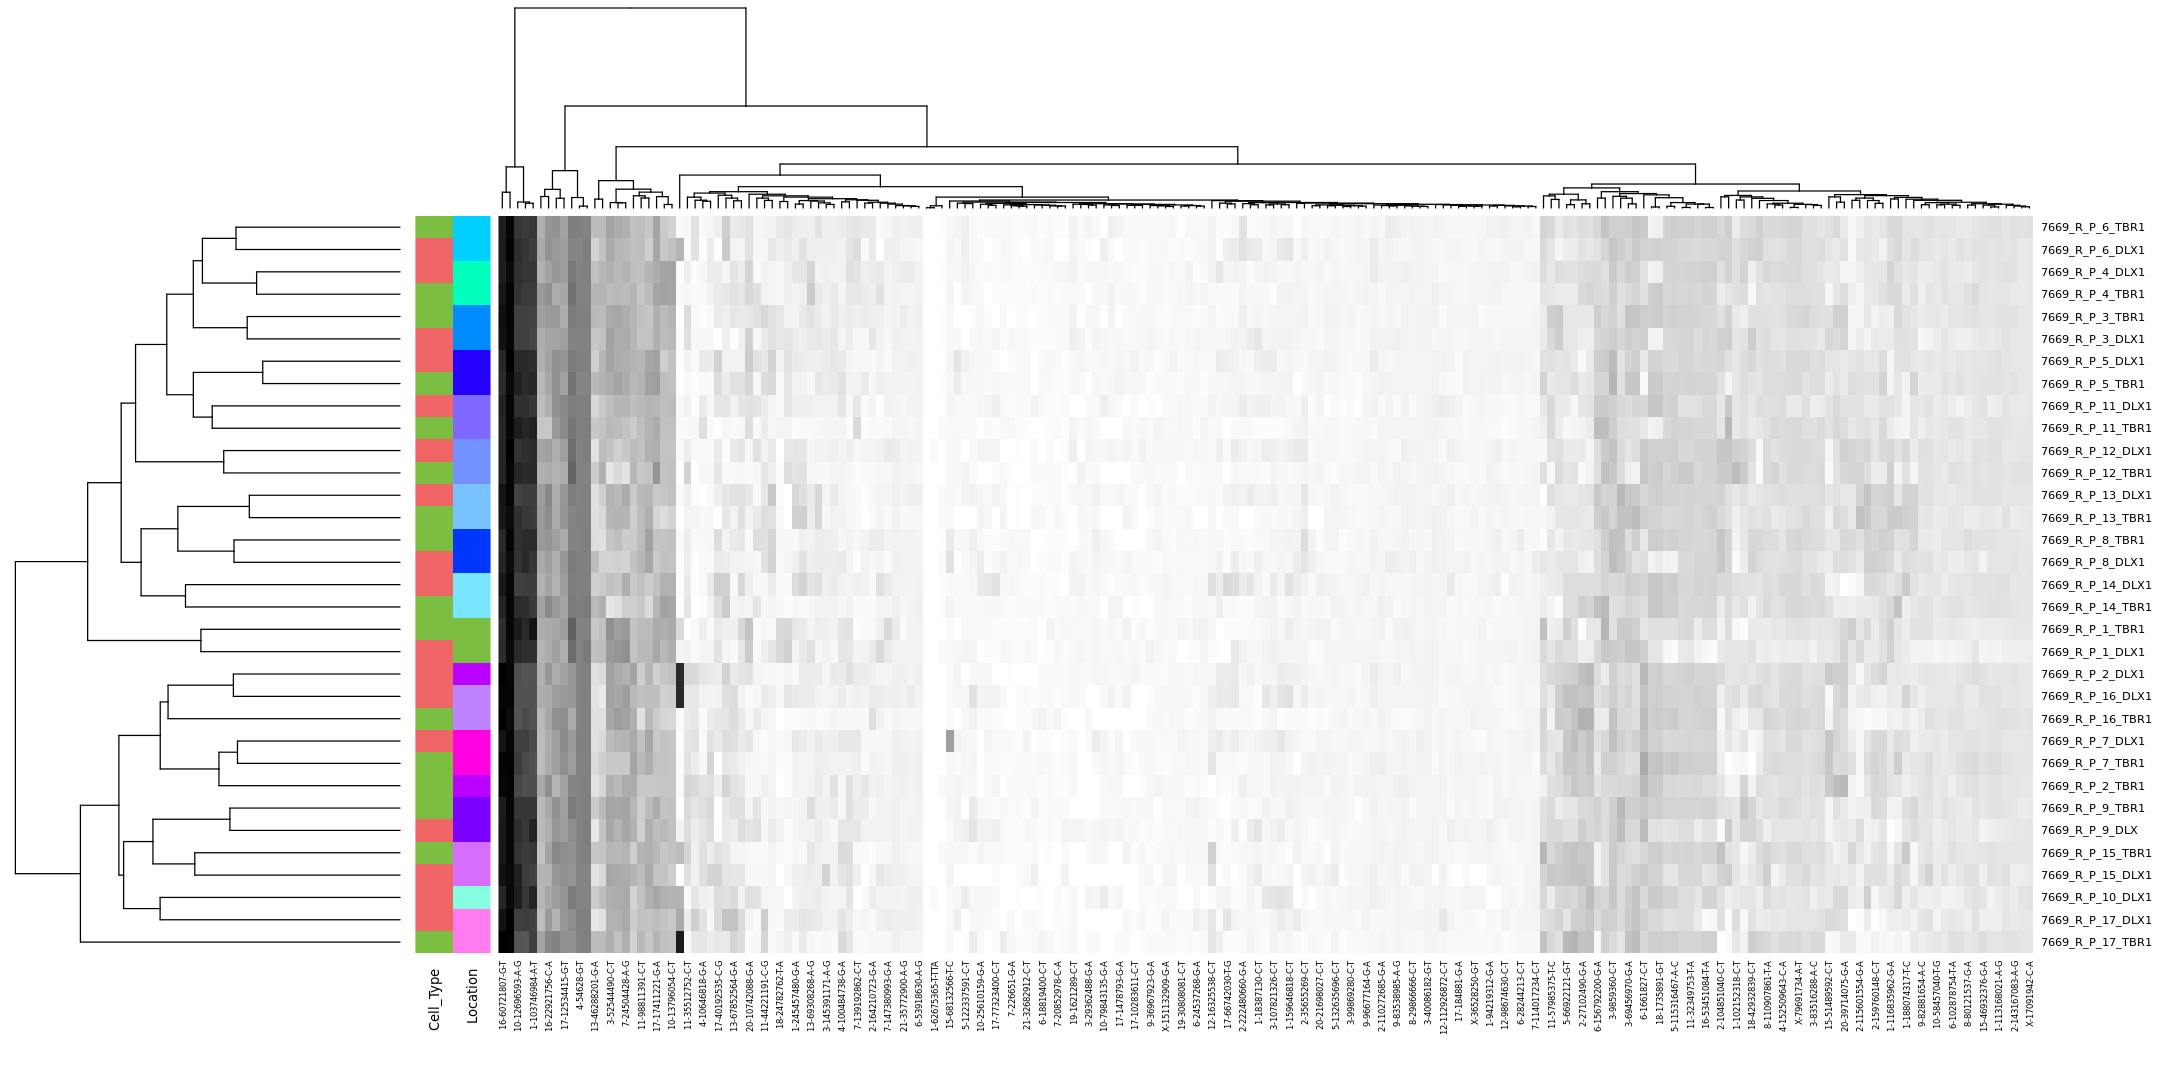

In [17]:
options(repr.plot.width=18, repr.plot.height=9)
# Colors = c("blue4","white","red4")
Colors = c("white","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))

In [71]:
pdf(file="7669_R_P_1to17_varXsample_heatmap2.pdf",height=9,width=18)
# Colors = c("blue4","white","red4")
Colors = c("white","black")
Colors = colorRampPalette(Colors)(100)
heatmap.plus(Normalized_casted_MAF_VarBySample2,
             distfun = function(x) dist(x,method = 'manhattan'),
             col=Colors, 
             RowSideColors=myCol2,
             margins=c(8,8),
             scale = c("none"))
dev.off()  

png 
  2

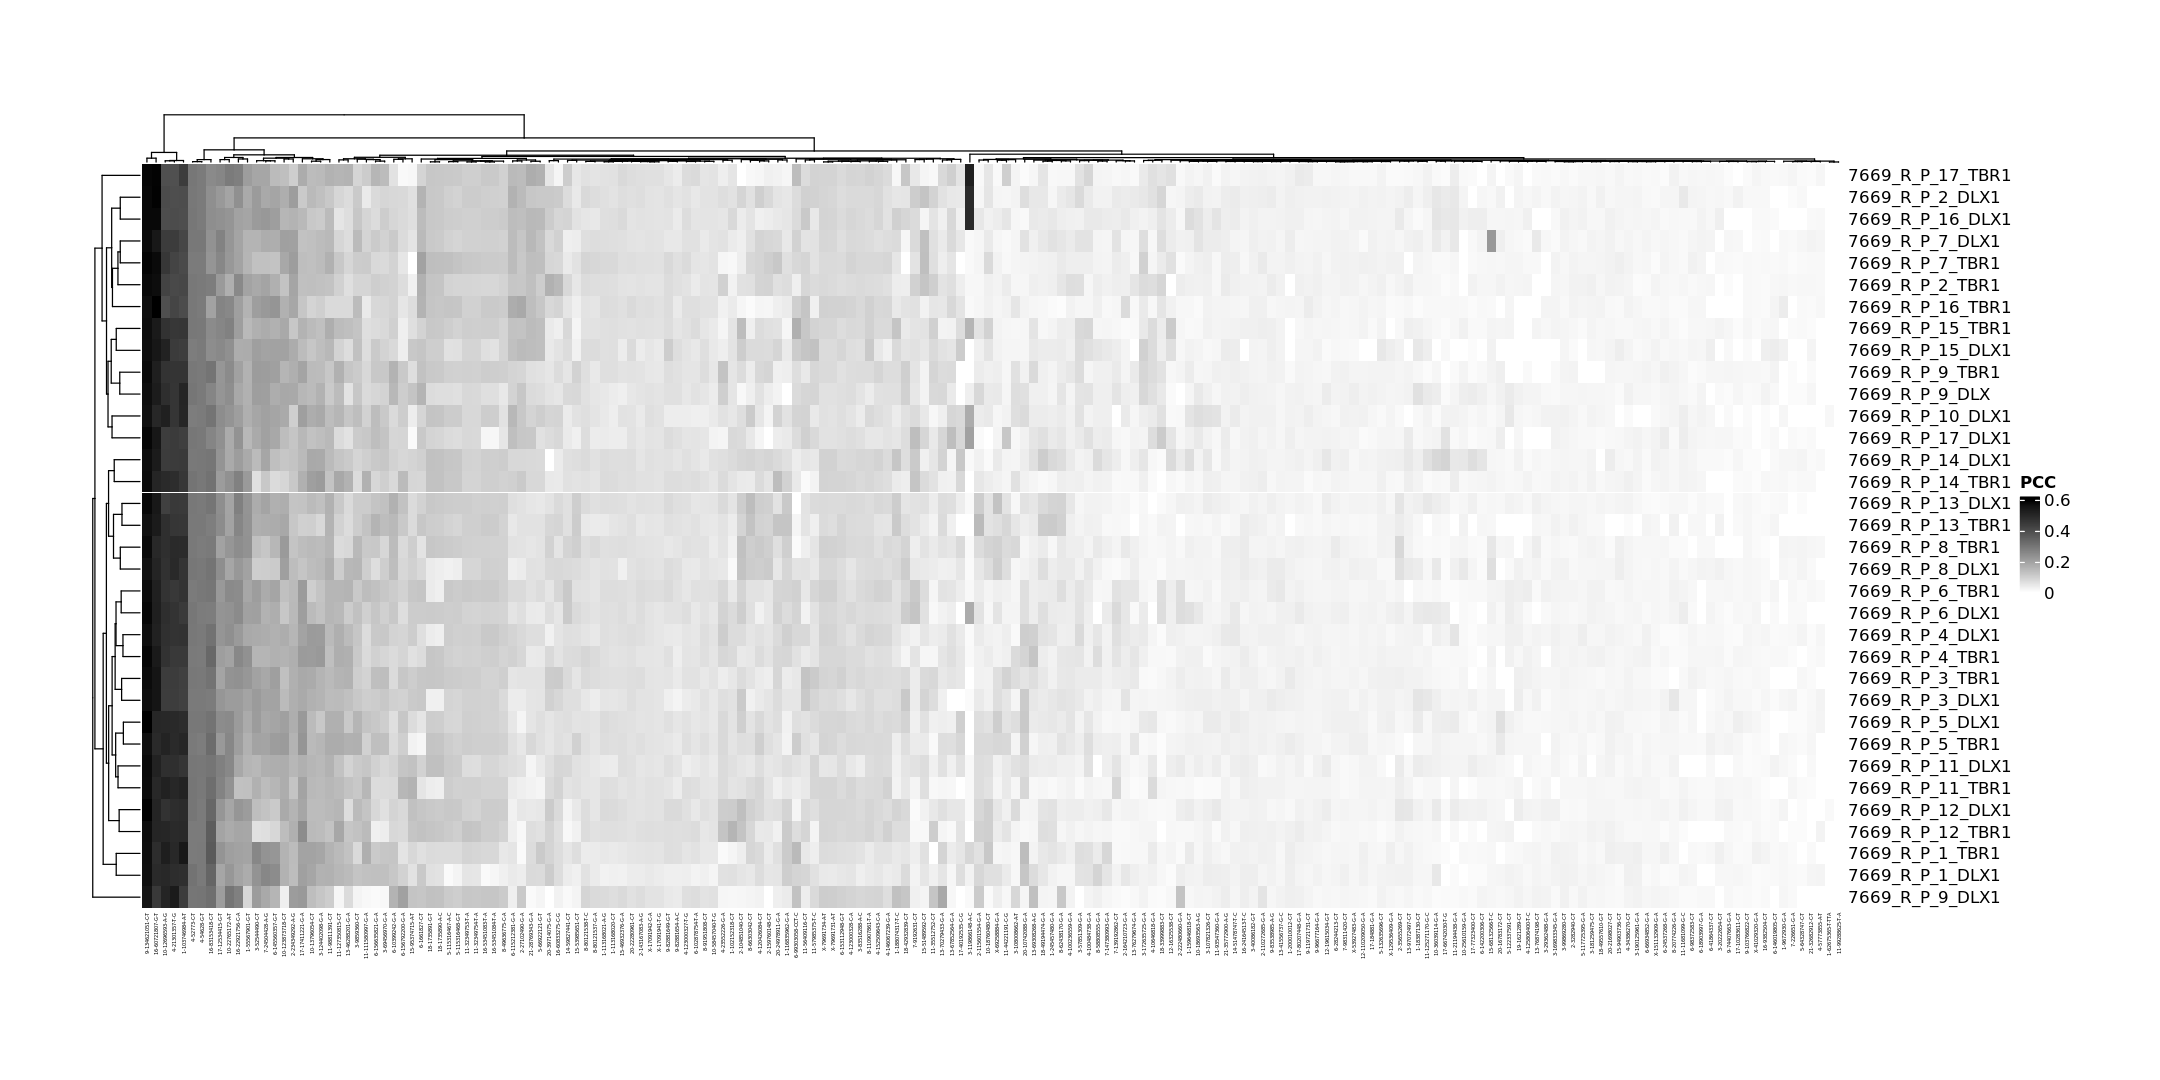

In [14]:
options(repr.plot.width = 18, repr.plot.height = 9)
p<-Heatmap(Normalized_casted_MAF_VarBySample2,
        col = c("white", "black"),
        row_names_gp = gpar(fontsize = "10"), column_names_gp = gpar(fontsize = "3"),
        name = "PCC",
        #left_annotation = left_right_cell_col_ann,
        clustering_method_rows = "complete", clustering_method_columns = "complete", 
        clustering_distance_rows = "manhattan", clustering_distance_columns = "manhattan",
        cluster_rows = TRUE, cluster_columns = TRUE,
        width = unit(36, "cm"),
        heatmap_height = unit(18, "cm")) 
p

In [15]:
pdf(file="7669_R_P_1to17_varXsample_complexheatmap.pdf",height=9,width=18)
p
dev.off()  

png 
  2

# Bias calculation

In [72]:
CTX_only_variants<-shared_variant_list[shared_variant_list$CTX==1 & shared_variant_list$R==1 & shared_variant_list$P==1,]$variant_list # 

[1] 0.01741891

[1] 0.01778762

[1] 0.01776676

[1] 0.01738588

[1] 0.3257917

[1] 0.2505323

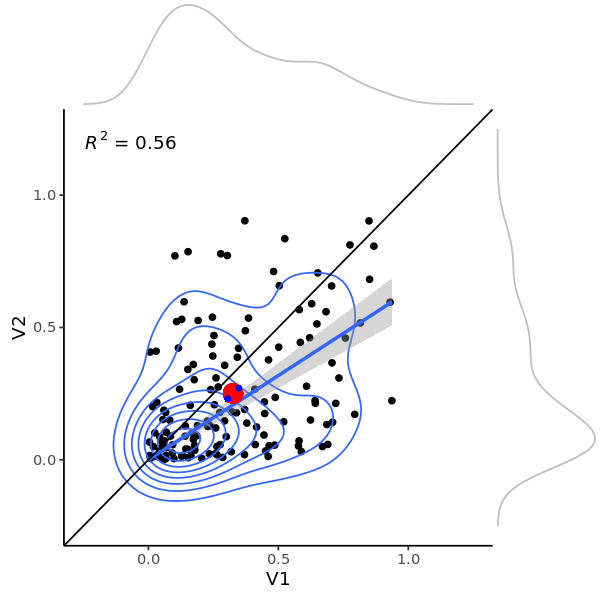

In [73]:
filtered_brain_only<-subset(shared_mosaic_filtered, CHROM.POS.REF.ALT %in% CTX_only_variants)

Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A','NEAR_AD','NEAR_AV','FAR_A','FAR_AD','FAR_AV') & Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('NEAR_P','NEAR_PD','NEAR_PV','FAR_P','FAR_PD','FAR_PV')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D','NEAR_PD','NEAR_AD','FAR_D','FAR_PD','FAR_AD')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V','NEAR_PV','NEAR_AV','FAR_PV','FAR_AV')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(CTX_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==CTX_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==CTX_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs((avg_xx-avg_yy)/max(avg_xx,avg_yy))
    }

for (i in 1:length(CTX_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==CTX_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==CTX_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs((avg_xx-avg_yy)/max(avg_xx,avg_yy))
    }

mean(delta[,1],na.rm=TRUE)
mean(delta[,2],na.rm=TRUE)
SEM_X<-sd(delta[,1],na.rm=TRUE) / sqrt(length(delta[,1]))
SEM_Y<-sd(delta[,2],na.rm=TRUE) / sqrt(length(delta[,2]))
lowerX<-mean(delta[,1],na.rm=TRUE)-SEM_X
upperX<-mean(delta[,1],na.rm=TRUE)+SEM_X
lowerY<-mean(delta[,2],na.rm=TRUE)-SEM_Y
upperY<-mean(delta[,2],na.rm=TRUE)+SEM_Y

formula <- y ~ x+0
p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+theme_classic()+
    geom_density_2d()+stat_smooth(method = "lm", formula = y ~ x+0, geom = "smooth")+geom_abline(slope=1, intercept=0)+stat_poly_eq(formula = y ~ x+0,method = "lm")+
    geom_point(x = mean(delta[,1],na.rm=TRUE), y = mean(delta[,2],na.rm=TRUE), aes(x, y), size = 5, color = "red")+
    geom_point(x = lowerX, y = lowerY, aes(x, y), size = 1, color = "blue")+
    geom_point(x = upperX, y = upperY, aes(x, y), size = 1, color = "blue")
options(repr.plot.width=5, repr.plot.height=5)
ggMarginal(p, color="grey", size=4)

In [74]:
pdf(file="7669_R_P_1to17_scatterplot_slope2_DLX1.pdf",height=8,width=8)
ggMarginal(p, color="grey", size=4)
dev.off()    

png 
  2

[1] 0.01772187

[1] 0.01772542

[1] 0.01768663

[1] 0.01809893

[1] 0.3014091

[1] 0.2514828

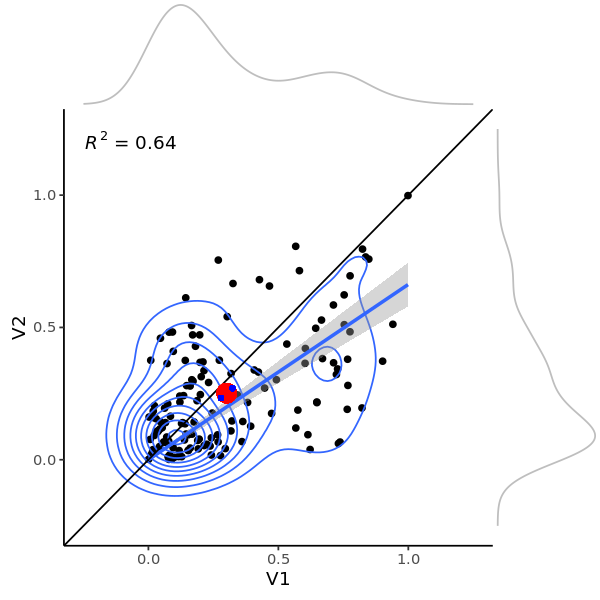

In [75]:
filtered_brain_only<-subset(shared_mosaic_filtered, CHROM.POS.REF.ALT %in% CTX_only_variants)

Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A','NEAR_AD','NEAR_AV','FAR_A','FAR_AD','FAR_AV') & Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('NEAR_P','NEAR_PD','NEAR_PV','FAR_P','FAR_PD','FAR_PV')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D','NEAR_PD','NEAR_AD','FAR_D','FAR_PD','FAR_AD')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V','NEAR_PV','NEAR_AV','FAR_PV','FAR_AV')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta2<-data.frame()
for (i in 1:length(CTX_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==CTX_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==CTX_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta2[i,1]<-abs((avg_xx-avg_yy)/max(avg_xx,avg_yy))
    }

for (i in 1:length(CTX_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==CTX_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==CTX_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta2[i,2]<-abs((avg_xx-avg_yy)/max(avg_xx,avg_yy))
    }

mean(delta2[,1],na.rm=TRUE)
mean(delta2[,2],na.rm=TRUE)
SEM_X<-sd(delta2[,1],na.rm=TRUE) / sqrt(length(delta2[,1]))
SEM_Y<-sd(delta2[,2],na.rm=TRUE) / sqrt(length(delta2[,2]))
lowerX<-mean(delta2[,1],na.rm=TRUE)-SEM_X
upperX<-mean(delta2[,1],na.rm=TRUE)+SEM_X
lowerY<-mean(delta2[,2],na.rm=TRUE)-SEM_Y
upperY<-mean(delta2[,2],na.rm=TRUE)+SEM_Y

formula <- y ~ x+0
p<-ggplot(delta2, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+theme_classic()+
    geom_density_2d()+stat_smooth(method = "lm", formula = y ~ x+0, geom = "smooth")+geom_abline(slope=1, intercept=0)+stat_poly_eq(formula = y ~ x+0,method = "lm")+
    geom_point(x = mean(delta2[,1],na.rm=TRUE), y = mean(delta2[,2],na.rm=TRUE), aes(x, y), size = 5, color = "red")+
    geom_point(x = lowerX, y = lowerY, aes(x, y), size = 1, color = "blue")+
    geom_point(x = upperX, y = upperY, aes(x, y), size = 1, color = "blue")
options(repr.plot.width=5, repr.plot.height=5)
ggMarginal(p, color="grey", size=4)

In [76]:
pdf(file="7669_R_P_1to17_scatterplot_slope2_TBR1.pdf",height=8,width=8)
ggMarginal(p, color="grey", size=4)
dev.off()    

png 
  2

In [62]:
delta$cell_type<-"DLX1"
delta2$cell_type<-"TBR1"

In [63]:
delta3<-rbind(delta,delta2)

In [64]:
colnames(delta3)<-c("AP","DV","cell_type")

In [65]:
summary(lm(DV ~ AP + cell_type + AP:cell_type + DV:cell_type,data=delta3))

Warning message in summary.lm(lm(DV ~ AP + cell_type + AP:cell_type + DV:cell_type, :
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = DV ~ AP + cell_type + AP:cell_type + DV:cell_type, 
    data = delta3)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.591e-15 -1.952e-17  1.010e-18  2.202e-17  3.688e-16 

Coefficients:
                   Estimate Std. Error    t value Pr(>|t|)    
(Intercept)      -1.488e-17  1.459e-17 -1.020e+00    0.308    
AP               -1.828e-17  3.758e-17 -4.860e-01    0.627    
cell_typeTBR1     1.076e-16  1.996e-17  5.391e+00 1.39e-07 ***
AP:cell_typeTBR1  2.176e-16  5.405e-17  4.026e+00 7.13e-05 ***
DV:cell_typeDLX1  1.000e+00  3.788e-17  2.640e+16  < 2e-16 ***
DV:cell_typeTBR1  1.000e+00  4.515e-17  2.215e+16  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.034e-16 on 311 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.959e+32 on 5 and 311 DF,  p-value: < 2.2e-16


In [66]:
delta3$diff<-delta3$AP-delta3$DV

In [67]:
head(delta3)

,AP,DV,cell_type,diff
,<dbl>,<dbl>,<chr>,<dbl>
1,0.26010718,0.30945968,DLX1,-0.049352504
2,0.36954034,0.01923150,DLX1,0.350308840
3,1.00000000,1.00000000,DLX1,0.000000000
4,0.29307755,0.14696449,DLX1,0.146113060
5,0.08469774,0.08930662,DLX1,-0.004608873
6,0.17862456,0.03626950,DLX1,0.142355066


In [68]:
p <- ggplot(delta3, aes(x=cell_type, y=diff, color=cell_type)) + 
  geom_violin(binaxis='', stackdir='', dotsize=1) + scale_color_manual(values=c("#EF6666","#7CBD42")) +
#geom_dotplot(binaxis='y', stackdir='center', dotsize=0.1)+
geom_jitter(shape=16, position=position_jitter(0.2)) + theme_classic()

Warning message in geom_violin(binaxis = "", stackdir = "", dotsize = 1):
“Ignoring unknown parameters: `binaxis`, `stackdir`, and `dotsize`”


Warning message:
“Removed 3 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


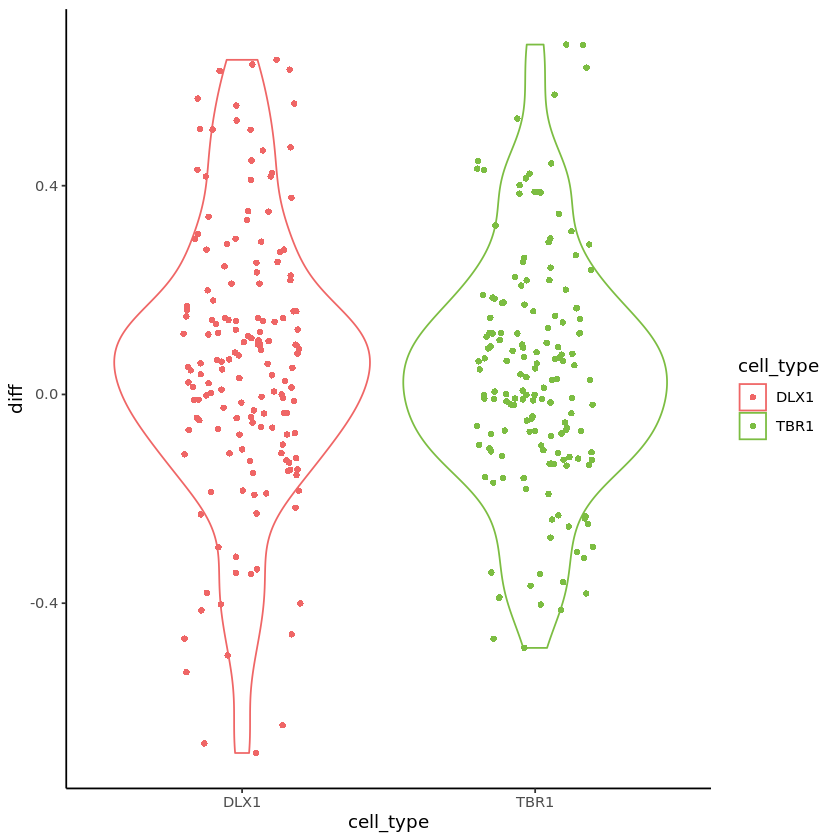

In [69]:
p

In [70]:
t.test(subset(delta3, cell_type=="DLX1")$diff,mu=0)


	One Sample t-test

data:  subset(delta3, cell_type == "DLX1")$diff
t = 2.8176, df = 158, p-value = 0.005457
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.0175948 0.1000927
sample estimates:
 mean of x 
0.05884374 


In [71]:
t.test(subset(delta3, cell_type=="TBR1")$diff,mu=0)


	One Sample t-test

data:  subset(delta3, cell_type == "TBR1")$diff
t = 1.9668, df = 157, p-value = 0.05097
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0001527319  0.0717677370
sample estimates:
mean of x 
0.0358075 
